In [1]:
# 행과열이 있는 데이터 조작 라이브러리
import pandas as pd
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import numpy as np

# 1. matplotlib 활용 기본차트 생성

### 1. 기본 시각화

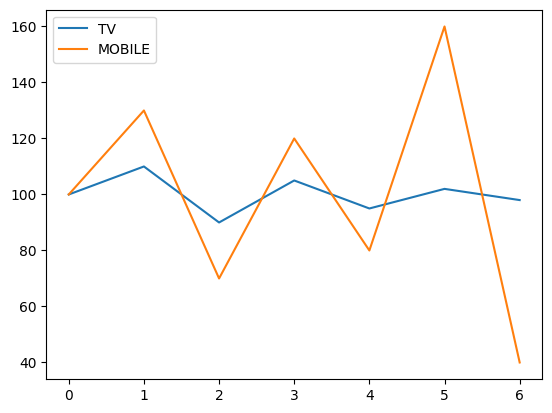

In [2]:
st1 = [100, 110, 90,105, 95, 102, 98]
st2 = [100, 130, 70,120, 80, 160, 40]
selloutDf = pd.DataFrame( zip(st1,st2),
             columns = ["TV","MOBILE"] )

# 데이터프레임에서 기본차트 생성
plt.plot( selloutDf.TV, label = "TV")
plt.plot( selloutDf.MOBILE, label = "MOBILE")
plt.legend()

# 리스트에서 기본차트 생성
# plt.plot( st1, label = "TV")
# plt.plot( st2, label = "MOBILE")
# plt.legend()

dataset 폴더 내 ST0001Data.csv 와 2 파일을 불러옵니다

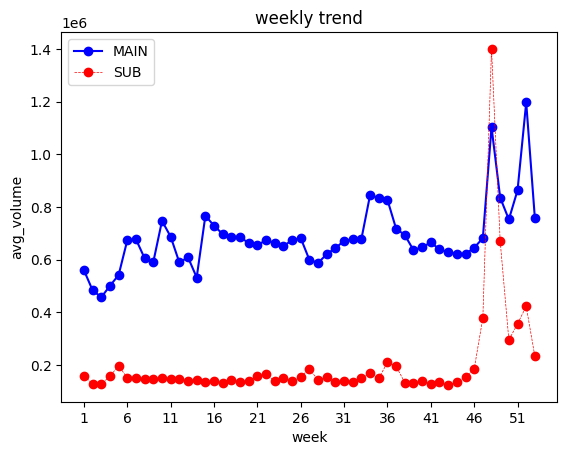

In [3]:
groupDataS01 = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/st0001data.csv")
groupDataS02 = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/st0002data.csv")
weekValue = groupDataS01.WEEK
volumeValueS01 = groupDataS01.MEAN_VOLUME
volumeValueS02 = groupDataS02.MEAN_VOLUME

xInterval = 5
plt.xticks( range( min(weekValue),
                   max(weekValue), xInterval ))
plt.xlabel("week")
plt.ylabel("avg_volume")
plt.title("weekly trend")
plt.plot(weekValue,volumeValueS01, "bo-", lw=1.5, label = "MAIN" )
plt.plot(weekValue,volumeValueS02, "ro--", lw=0.5, label = "SUB" )
plt.legend()

../dataset/feature_regression_example.csv
 데이터를 활용하여
2015년도 자료만 활용하여
x축: week, y축: qty를 라인차트로 그리세요

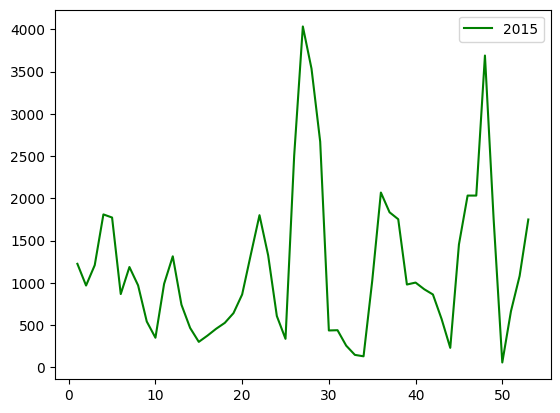

In [4]:
featuresLocalUrl = "../dataset/feature_regression_example.csv"
featuresGitUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData =  pd.read_csv(featuresGitUrl)
featuresData.head()

df = featuresData.loc[featuresData['YEAR'] == 2015]
df.shape

x = df['WEEK']
y = df['QTY']

plt.plot(x,y,'g',label = '2015')
plt.legend(loc=0)

### 2. 서브플롯 그리기

In [5]:
groupDataS01 = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/st0001data.csv")
groupDataS02 = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/st0002data.csv")
weekValue = groupDataS01.WEEK
volumeValueS01 = groupDataS01.MEAN_VOLUME
volumeValueS02 = groupDataS02.MEAN_VOLUME

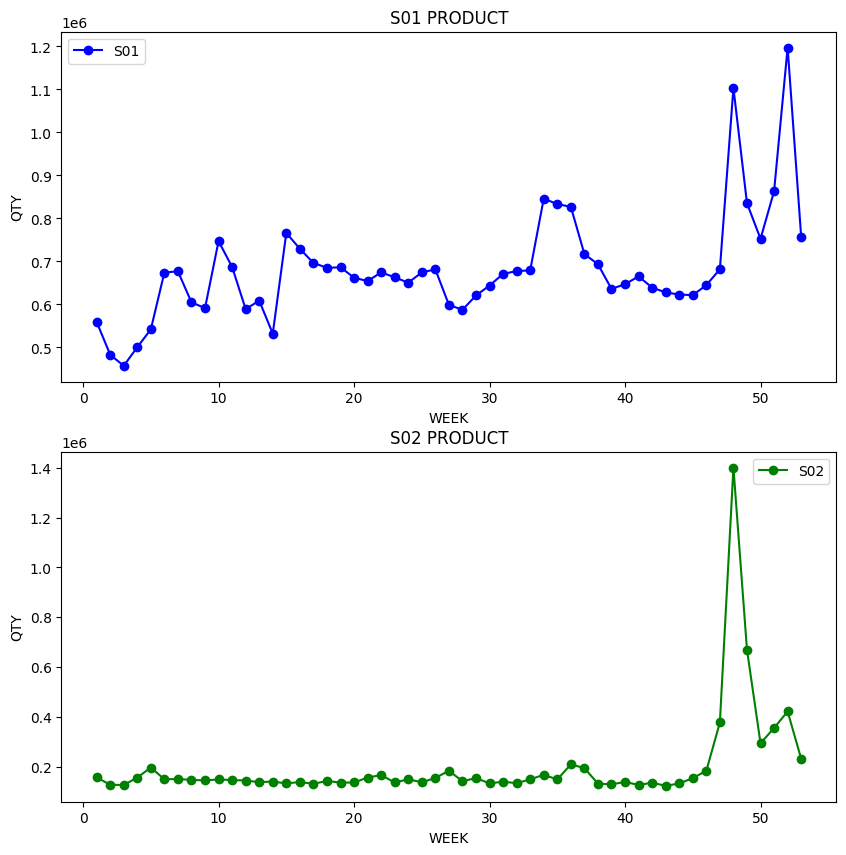

In [6]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.plot(weekValue, volumeValueS01, "bo-", lw=1.5, label = "S01")
ax1.set_title("S01 PRODUCT")
ax1.set_xlabel("WEEK")
ax1.set_ylabel("QTY")
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.plot(weekValue, volumeValueS02, "go-", lw=1.5, label = "S02")
ax2.set_title("S02 PRODUCT")
ax2.set_xlabel("WEEK")
ax2.set_ylabel("QTY")
ax2.legend()

### 3. 이중축 그리기

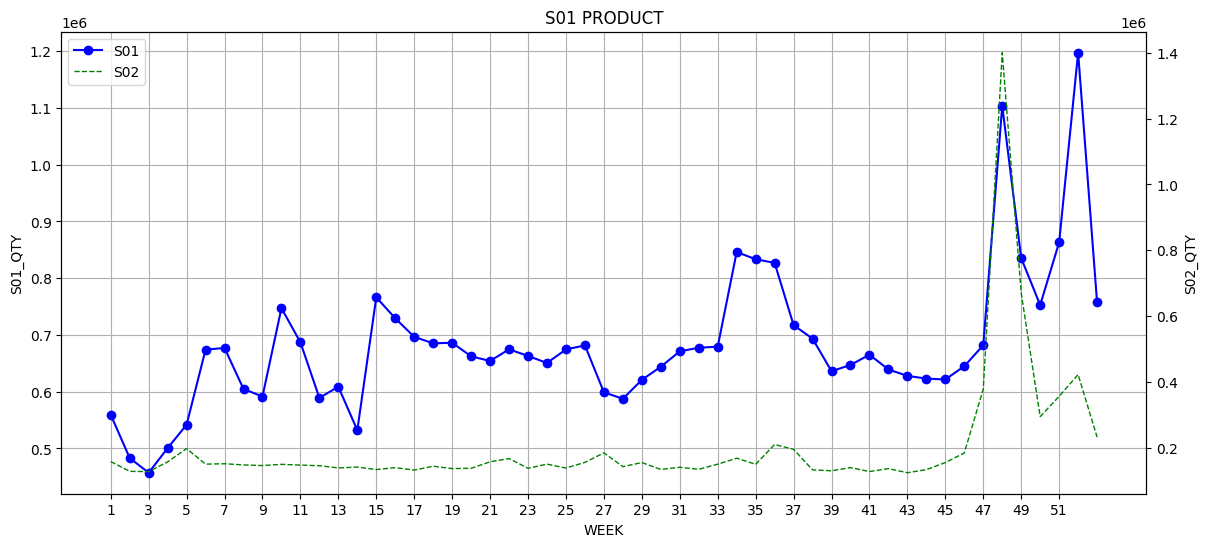

In [7]:
# 도화지 그리기
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(weekValue, volumeValueS01, "bo-", lw=1.5, label = "S01")
ax1.set_title("S01 PRODUCT")
ax1.set_xlabel("WEEK")
ax1.set_ylabel("S01_QTY")

# xticks 설정
ax1.set_xticks(range(min(weekValue), max(weekValue), 2))
ax1.grid(True)
# 이중축 그리기 준비
ax2 = ax1.twinx()
ax2.plot(weekValue, volumeValueS02, "g--", lw=1, label = "S02")
ax2.set_ylabel("S02_QTY")

# # 표식 한곳에 정리하기
# ax1.legend(loc=0)
# ax2.legend(loc=4)

# 표식 한곳에 정리하기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# 표식정리
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc=0)

# 2. Seaborn 활용 차트 생성

### 1. 카운트 플롯

<Axes: xlabel='EMI', ylabel='count'>

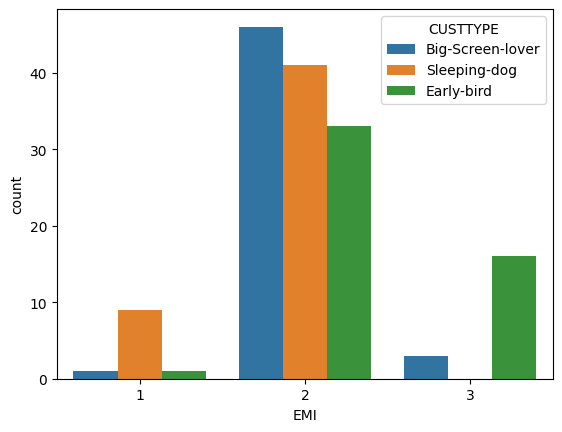

In [8]:
import seaborn as sns
import pandas as pd

# customerLocalUrl = "../dataset/customerdata.csv"
customerGitUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/customerdata.csv"
csData = pd.read_csv(customerGitUrl)

# 각 카테고리별 value count
order = csData.EMI.value_counts(ascending=False).index
order

sns.countplot( data=csData,
               x="EMI",
               hue = "CUSTTYPE" )

### 2. 히스토그램

<Axes: xlabel='AVGPRICE', ylabel='Count'>

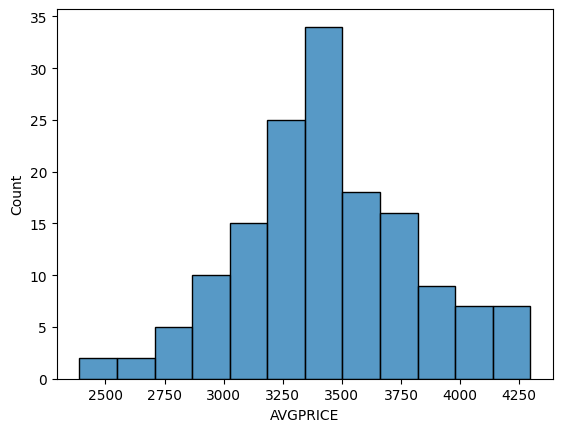

In [9]:
sns.histplot(csData.AVGPRICE)

<Axes: xlabel='AVGPRICE', ylabel='Density'>

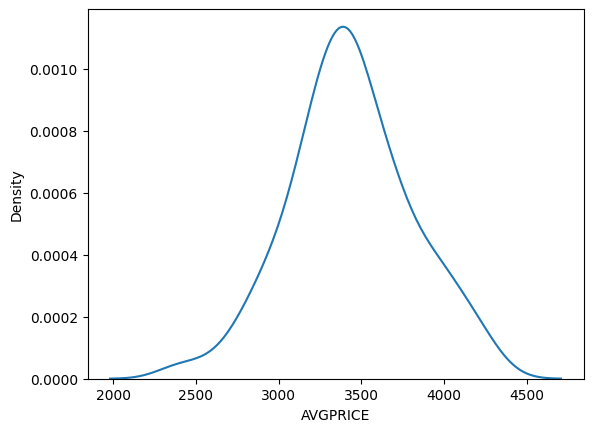

In [10]:
sns.kdeplot(csData.AVGPRICE)

### 3. 박스플롯

<Axes: xlabel='EMI', ylabel='AVGPRICE'>

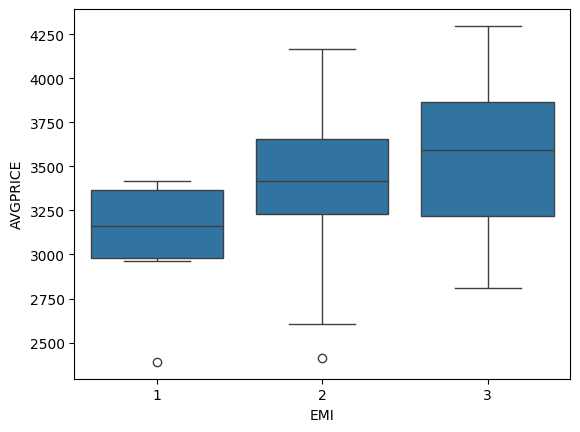

In [11]:
sns.boxplot( data = csData,
             x="EMI",
             y="AVGPRICE")

### 4. 바 차트

<ipython-input-12-ecbd9b2407c1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot( x="EMI", y="AVGPRICE", data=csData, hue="CUSTTYPE", ci="sd")


<Axes: xlabel='EMI', ylabel='AVGPRICE'>

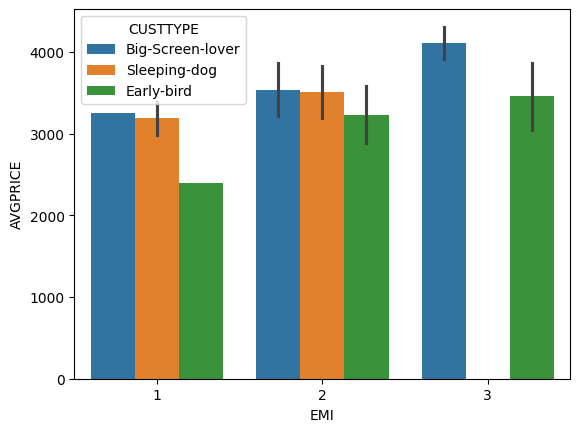

In [12]:
sns.barplot( x="EMI", y="AVGPRICE", data=csData, hue="CUSTTYPE", ci="sd")

### 5. 라인차트

<Axes: xlabel='YEARWEEK', ylabel='QTY'>

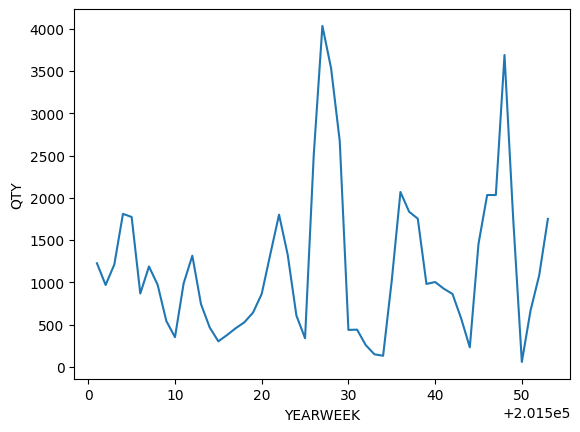

In [13]:
import pandas as pd
featuresData = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv")
featuresData.shape
features2015 = featuresData.loc[ featuresData.YEAR == 2015 ]
sns.lineplot(data=features2015, x="YEARWEEK", y="QTY")

In [14]:
featuresData.corr(numeric_only=True)

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000


### 6. LM 차트

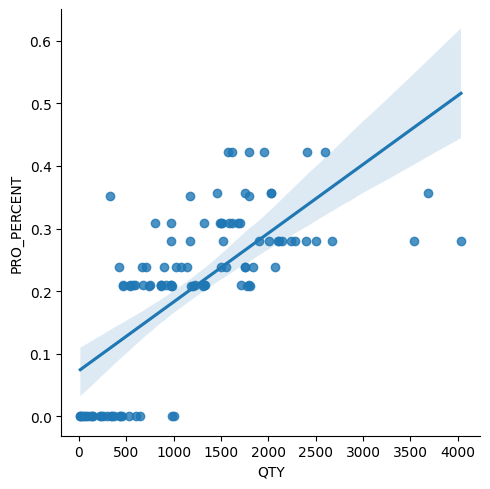

In [15]:
sns.lmplot(data=featuresData,
           x="QTY",
           y="PRO_PERCENT")

### 7.상관분석 및 HeatMap

In [16]:
featureCorrDf = featuresData.corr(numeric_only=True)

In [17]:
stdCorr = 0.3

In [18]:
# 데이터 분석
listData = ["1","2","3"]
pd.DataFrame(listData)
# 이미지 분석
np.array( [255,0,192,150] ) / 255.0
# SET 데이터 타입!!!
features = ["QTY","PROMOTION"] # 문제지
label=["QTY"]  # 정답지

In [19]:
features = list( featureCorrDf.loc[ abs( featureCorrDf.QTY ) > stdCorr ].index )
featuresFinal = list( set(features) - set(label) )
print(f"선정된 features:  {featuresFinal}")

선정된 features:  ['PRO_PERCENT', 'HCLUS']


### 정렬 후 히트맵 작성 (예시)

<Axes: >

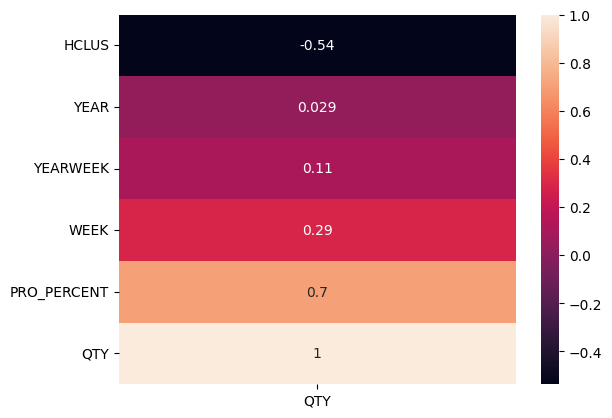

In [20]:
feature_corr_df = featuresData.corr(numeric_only=True)
feature_QTY=feature_corr_df.QTY.sort_values()
sns.heatmap(pd.DataFrame(feature_QTY), annot=True)

### 정렬 및 트랜스포즈 후 히트맵 표시 (예시)

<Axes: >

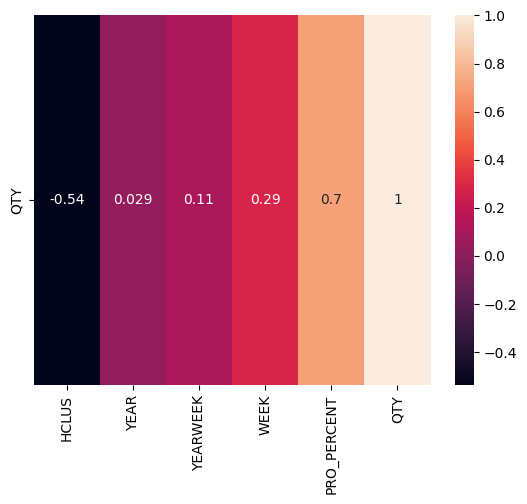

In [21]:
featuresCorr = featuresData.corr(numeric_only=True)
qty_corr = featuresCorr['QTY'].sort_values()
sns.heatmap(qty_corr.to_frame().T, annot=True)